In [1]:
!git clone https://github.com/ishanchadha01/eeg-ml.git

Cloning into 'eeg-ml'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 214 (delta 18), reused 46 (delta 11), pack-reused 161
Receiving objects: 100% (214/214), 477.02 MiB | 24.62 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Checking out files: 100% (91/91), done.


In [2]:
!python3 -m pip install mne

     |████████████████████████████████| 6.6MB 5.3MB/s 


In [2]:
cd ..


c:\Users\rishi\Documents\School Docs - 2019-20\Summer 2020\CS 4641\Project\eeg-ml\project


In [3]:
cd data

c:\Users\rishi\Documents\School Docs - 2019-20\Summer 2020\CS 4641\Project\eeg-ml\project\data


In [4]:
!python make_csv.py

Extracting EDF parameters from /content/eeg-ml/project/data/raw-data/00010164/s002_2013_01_28/00010164_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/eeg-ml/project/data/raw-data/00010164/s001_2013_01_16/00010164_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/eeg-ml/project/data/raw-data/00010120/s001_2013_02_15/00010120_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/eeg-ml/project/data/raw-data/00010167/s001_2013_01_09/00010167_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/eeg-ml/project/data/raw-data/00010184/s001_2013_01_15/00010184_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.inf

In [4]:
import pandas as pd
import glob

subjectData = []
files = glob.glob('csv-data/*.csv')

for csvfile in files:
  dframe = pd.read_csv(csvfile)
  dframe = dframe.loc[:, dframe.columns.str.startswith('EEG')]
  dframe *= 1000000
  subjectData.append(dframe)
  print(dframe.shape)

print(str(len(subjectData)))

(376750, 25)
(379000, 25)
(321000, 25)
(319000, 25)
(316000, 25)
(375500, 25)
(447000, 25)
(454000, 25)
(410000, 25)
(382500, 30)
(376000, 30)
(454000, 25)
(405750, 25)
(339000, 30)
(499750, 25)
(402500, 25)
(359750, 25)
(379000, 25)
(346750, 25)
(614250, 25)
(391250, 25)
(304384, 29)
(332250, 30)
(334500, 30)
(338750, 30)
(349500, 30)
(336000, 30)
(352000, 30)
(342500, 30)
(336750, 30)
(346500, 30)
(314750, 25)
(342500, 25)
(395250, 25)
(332500, 25)
(266000, 25)
36


In [7]:
bigList = [df.columns for df in subjectData if len(df.columns) == 23]
print(bigList)

[Index(['EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF',
       'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF',
       'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF',
       'EEG T1-REF', 'EEG T2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF',
       'EEG EKG1-REF', 'EEG A1-REF', 'EEG A2-REF'],
      dtype='object')]


In [8]:
validColumns = bigList[0]
for val in range(len(subjectData)):
  df = subjectData[val]
  listVal = [x for x in df.columns if x not in validColumns]
  df = df.drop(columns=listVal)
  print(df.shape)
  subjectData[val] = df
print("Final:")
for df in subjectData:
  print(df.shape)

(376750, 23)
(379000, 23)
(321000, 23)
(319000, 23)
(316000, 23)
(375500, 23)
(447000, 23)
(454000, 23)
(410000, 23)
(382500, 23)
(376000, 23)
(454000, 23)
(405750, 23)
(339000, 23)
(499750, 23)
(402500, 23)
(359750, 23)
(379000, 23)
(346750, 23)
(614250, 23)
(391250, 23)
(304384, 23)
(332250, 23)
(334500, 23)
(338750, 23)
(349500, 23)
(336000, 23)
(352000, 23)
(342500, 23)
(336750, 23)
(346500, 23)
(314750, 23)
(342500, 23)
(395250, 23)
(332500, 23)
(266000, 23)
Final:
(376750, 23)
(379000, 23)
(321000, 23)
(319000, 23)
(316000, 23)
(375500, 23)
(447000, 23)
(454000, 23)
(410000, 23)
(382500, 23)
(376000, 23)
(454000, 23)
(405750, 23)
(339000, 23)
(499750, 23)
(402500, 23)
(359750, 23)
(379000, 23)
(346750, 23)
(614250, 23)
(391250, 23)
(304384, 23)
(332250, 23)
(334500, 23)
(338750, 23)
(349500, 23)
(336000, 23)
(352000, 23)
(342500, 23)
(336750, 23)
(346500, 23)
(314750, 23)
(342500, 23)
(395250, 23)
(332500, 23)
(266000, 23)


In [9]:
for df in subjectData:
  print(df.head())

218557  -30.971818   
3   21.518376    3.970782   33.267634  -17.086330   36.319390  -34.633924   
4   12.515697   -1.980141   26.858948  -19.832910   32.962459  -39.669321   

   EEG EKG1-REF  EEG T1-REF  EEG T2-REF  
0   -168.605987  -27.309711  -11.745758  
1   -119.777900   42.117725   32.199520  
2   -140.835013   11.600171   11.905346  
3   -144.649707    5.801835    5.954423  
4   -147.091111    1.529378   -2.132729  

[5 rows x 23 columns]
   EEG FP2-REF  EEG F3-REF  EEG F4-REF  EEG C3-REF  EEG C4-REF  EEG P3-REF  \
0    -0.149088   14.804514    1.224202    7.480301  -18.001857    9.921705   
1    -2.743080   13.736399   -0.454263    8.701003  -20.443261    9.311354   
2    -4.421545   12.363109   -3.963782    7.175125  -25.783833    5.649248   
3    -9.609530   13.888987   -3.506019    4.428545  -25.326070    4.733721   
4    -4.116370   15.109689   -1.674965    4.886309  -21.511376    6.412186   

   EEG P4-REF  EEG O1-REF  EEG O2-REF  EEG F7-REF  ...  EEG T5-REF  \
0    5.80

[(376750, 23), (379000, 23), (321000, 23), (319000, 23), (316000, 23), (375500, 23), (447000, 23), (454000, 23), (410000, 23), (382500, 23), (376000, 23), (454000, 23), (405750, 23), (339000, 23), (499750, 23), (402500, 23), (359750, 23), (379000, 23), (346750, 23), (614250, 23), (391250, 23), (304384, 23), (332250, 23), (334500, 23), (338750, 23), (349500, 23), (336000, 23), (352000, 23), (342500, 23), (336750, 23), (346500, 23), (314750, 23), (342500, 23), (395250, 23), (332500, 23), (266000, 23)]


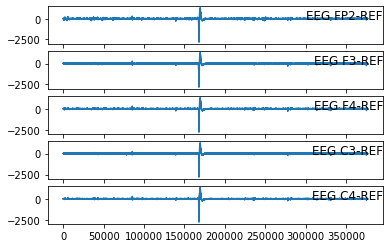

In [10]:
from matplotlib import pyplot
subjectValues = []
for i in range(len(subjectData)):
	subjectValues.append(subjectData[i].values)

print(str([df.shape for df in subjectValues]))

groups = range(0, 5)
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(subjectValues[0][:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()


In [24]:
from sklearn.preprocessing import MinMaxScaler

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = []
for i in range(len(subjectValues)):
	scaled = subjectValues[i]
	print(scaled.shape)
	supervisedScaled = series_to_supervised(scaled, 2, 5)
	reframed.append(supervisedScaled)
#reframed.drop(reframed.columns[range(26, 50)], axis=1, inplace=True)
print(str([df.shape for df in reframed]))
print(reframed[0])

(376750, 23)
(379000, 23)
(321000, 23)
(319000, 23)
(316000, 23)
(375500, 23)
(447000, 23)
(454000, 23)
(410000, 23)
(382500, 23)
(376000, 23)
(454000, 23)
(405750, 23)
(339000, 23)
(499750, 23)
(402500, 23)
(359750, 23)
(379000, 23)
(346750, 23)
(614250, 23)
(391250, 23)
(304384, 23)
(332250, 23)
(334500, 23)
(338750, 23)
(349500, 23)
(336000, 23)


MemoryError: Unable to allocate array with shape (161, 336000) and data type float64

In [12]:
import random
train_sets = random.sample(range(0, len(reframed)), len(reframed))

train_division = 18
val_division = 8
test_division = 10

train_subject_list = train_sets[0:train_division]
val_subject_list = train_sets[train_division:(train_division+val_division)]
test_subject_list = train_sets[(train_division+val_division):len(train_sets)]

print(str(train_subject_list))
print(str(val_subject_list))
print(str(test_subject_list))

train_dframe = pd.DataFrame(columns = reframed[0].columns)
for val in train_subject_list:
    print(val)
    train_dframe = train_dframe.append(reframed[val], ignore_index=True)
print(train_dframe.shape)

val_dframe = pd.DataFrame(columns = reframed[0].columns)
for val in val_subject_list:
    print(val)
    val_dframe = val_dframe.append(reframed[val], ignore_index=True)
print(val_dframe.shape)

test_dframe = pd.DataFrame(columns = reframed[0].columns)
for val in test_subject_list:
    print(val)
    test_dframe = test_dframe.append(reframed[val], ignore_index=True)
print(test_dframe.shape)

[0, 7, 21, 11, 19, 15, 22, 1, 10, 17, 6, 32, 29, 24, 8, 5, 12, 9]
[18, 35, 28, 2, 26, 14, 25, 20]
[31, 27, 23, 33, 13, 3, 30, 4, 16, 34]
0
7
21
11
19
15
22
1
10
17
6
32
29
24
8
5
12
9
(7110776, 161)
18
35
28
2
26
14
25
20
(2852702, 161)
31
27
23
33
13
3
30
4
16
34
(3409190, 161)


In [13]:
cd ..

c:\Users\rishi\Documents\School Docs - 2019-20\Summer 2020\CS 4641\Project\eeg-ml\project


In [14]:
cd nn/


c:\Users\rishi\Documents\School Docs - 2019-20\Summer 2020\CS 4641\Project\eeg-ml\project\nn


In [25]:
print(train_dframe.head())

var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var6(t-2)  \
0  33.572810  41.812549  30.215879  18.008857  23.196841  29.758115   
1  35.251275  37.997855  27.164123  14.651926  20.908025  27.927062   
2  37.387504  35.861626  24.875307  12.515697  17.856269  25.943421   
3  37.234916  37.387504  28.537413  14.041575  20.908025  28.232238   
4  29.452940  33.420222  25.638246  11.905346  18.771796  27.621887   

   var7(t-2)  var8(t-2)  var9(t-2)  var10(t-2)  ...  var14(t+4)  var15(t+4)  \
0   9.769117 -11.745758 -17.238918   20.755437  ...   -6.710362    7.785476   
1   7.175125 -11.593171 -13.119048   20.602849  ...   -6.252599    8.853591   
2   5.038896 -10.677644 -10.677644   20.908025  ...   -6.252599    6.717362   
3   8.243240  -6.100011  -1.064614   16.482979  ...   -3.048255    5.954423   
4   6.412186  -4.421545   2.292317   13.278636  ...   -4.268958    4.428545   

   var16(t+4)  var17(t+4)  var18(t+4)  var19(t+4)  var20(t+4)  var21(t+4)  \
0   -5.031896    7.17512

In [57]:
# split into input and outputs
train = train_dframe
print(str(train_dframe.shape) + " " + str(type(train)))
train_X = train.loc[:, :'var23(t-1)']
train_y = train.loc[:, 'var1(t)':]
print(train_y.shape)
test = val_dframe
test_X = test.loc[:, :'var23(t-1)']
test_y = test.loc[:, 'var1(t)':]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 2, int(train_X.shape[1]/2)))
test_X = test_X.reshape((test_X.shape[0], 2, int(test_X.shape[1]/2)))
train_X = train_X.reshape((train_y.shape[0], 5, int(train_y.shape[1]/5)))
test_X = test_X.reshape((test_y.shape[0], 5, int(test_y.shape[1]/5)))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7110776, 161) <class 'pandas.core.frame.DataFrame'>
(7110776, 115)


AttributeError: 'DataFrame' object has no attribute 'reshape'

Train on 188374 samples, validate on 188375 samples
Epoch 1/50
 - 9s - loss: 30.0820 - val_loss: 9.2729
Epoch 2/50
 - 8s - loss: 28.0161 - val_loss: 8.5976
Epoch 3/50
 - 8s - loss: 27.2561 - val_loss: 8.1904
Epoch 4/50
 - 8s - loss: 26.7538 - val_loss: 8.0367
Epoch 5/50
 - 8s - loss: 26.3434 - val_loss: 7.7472
Epoch 6/50
 - 8s - loss: 26.0019 - val_loss: 7.3910
Epoch 7/50
 - 8s - loss: 25.6093 - val_loss: 7.2575
Epoch 8/50
 - 8s - loss: 25.3563 - val_loss: 7.0162
Epoch 9/50
 - 8s - loss: 25.1085 - val_loss: 7.0377
Epoch 10/50
 - 8s - loss: 25.0021 - val_loss: 6.8783
Epoch 11/50
 - 8s - loss: 24.7533 - val_loss: 6.8302
Epoch 12/50
 - 8s - loss: 24.6657 - val_loss: 6.7668
Epoch 13/50
 - 8s - loss: 24.4962 - val_loss: 6.5645
Epoch 14/50
 - 8s - loss: 24.4459 - val_loss: 6.6057
Epoch 15/50
 - 9s - loss: 24.2741 - val_loss: 6.5070
Epoch 16/50
 - 9s - loss: 24.1469 - val_loss: 6.5946
Epoch 17/50
 - 8s - loss: 24.0326 - val_loss: 6.3632
Epoch 18/50
 - 8s - loss: 23.9098 - val_loss: 6.3513
Epo

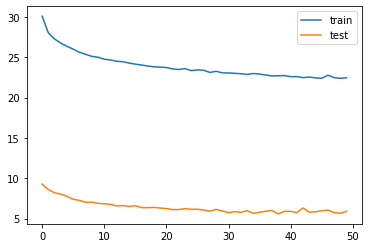

In [ ]:
from sklearn.metrics import mean_squared_error
import keras

# design network
model = keras.models.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(keras.layers.Dense(25))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

(188375, 25)
(188375, 25)
(188375, 25)


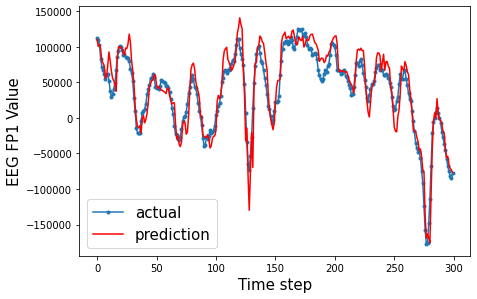

In [ ]:
prediction = model.predict(test_X)
print(prediction.shape)
test_predict = scaler.inverse_transform(prediction)
print(test_y.shape)
Ytest = scaler.inverse_transform(test_y)
print(Ytest.shape)

aa=[x for x in range(300)]
pyplot.figure()
pyplot.plot(aa, Ytest[-500:-200, 1], marker='.', label="actual")
pyplot.plot(aa, test_predict[-500:-200, 1], 'r', label="prediction")
#pyplot.plot(aa, abs(Ytest[:2000, 0] - test_predict[:2000, 0]), 'r', label="difference")
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('EEG FP1 Value', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show();